## Diferenças Finitas

<Axes: >

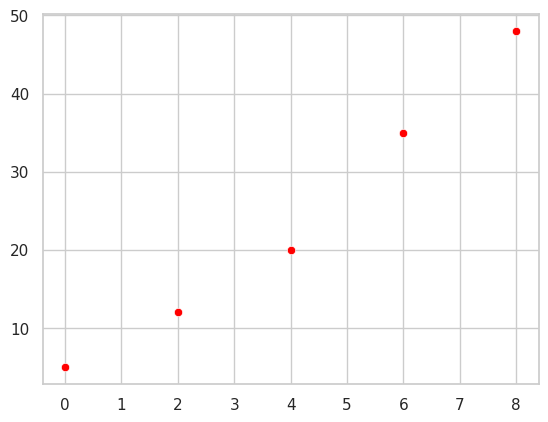

In [ ]:
# Importação de Bibliotecas
import seaborn as sns
import pandas as pd
import numpy as np
# Configura o tema do Seaborn para os gráficos
sns.set_theme(context="notebook",style="whitegrid",palette="flare")

# Valores de X
list_x = [0,2, 4, 6, 8]
# Valores de Y
list_y = [5,12,20,35,48]
# Visualização de valores de X e Y
sns.scatterplot(x=list_x, y=list_y, color="r")

## Criação da tabela de Diferenças Finitas

In [ ]:
# Quantidade de pontos
n = len(list_x)
# Espaçamento entre os valores
h = list_x[1] - list_x[0]

# Matriz das diferenças
differences_matrix = []
# Geração da Matriz
for _ in range(n):
    differences_matrix.append([0] * n)
# Preenchimento da primeira coluna com os valores de f(x)
for i in range(n):
    differences_matrix[i][0] = list_y[i]
# Preenchimento do resto da Matriz de diferenças
for j in range(1, n):
        for i in range(n - j):
            differences_matrix[i][j] = differences_matrix[i + 1][j-1] - differences_matrix[i][j-1]
# Impressão da matriz de diferenças finitas
matrix = pd.DataFrame(differences_matrix)
print(matrix.to_markdown(index=False))

|   0 |   1 |   2 |   3 |   4 |
|----:|----:|----:|----:|----:|
|   5 |   7 |   1 |   6 | -15 |
|  12 |   8 |   7 |  -9 |   0 |
|  20 |  15 |  -2 |   0 |   0 |
|  35 |  13 |   0 |   0 |   0 |
|  48 |   0 |   0 |   0 |   0 |


## Interpolando um Número

In [ ]:
# Valor a ser interpolado
value_to_interpolate = 7

# Inicializa a aproximação com o primeiro valor da matriz de diferenças (valor inicial da interpolação)
aproximation = differences_matrix[0][0]
# Inicializa a variável que armazenará os termos sucessivos do somatório
successive_terms = 1
# Loop para calcular a aproximação usando o método das Diferenças Finitas
for j in range(1, n):
    # Calcula o próximo termo do somatório da interpolação de Newton para diferenças finitas
    # Multiplica pelo fator (x - x_{j-1}) normalizado pelo fatorial (j * h)
    successive_terms *= (value_to_interpolate - list_x[j-1]) / (j * h)
    # Adiciona o termo correspondente ao resultado acumulado
    aproximation += successive_terms * differences_matrix[0][j]

print(f'A aproximacao encontrada para f({value_to_interpolate}) = {aproximation:.4f}')

A aproximacao encontrada para f(7) = 42.8984


## Interpolando N Valores dentro do Intervalo dos dados

<Axes: >

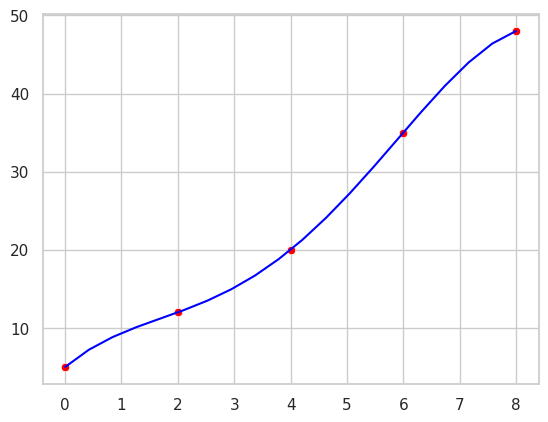

In [ ]:
# Lista com o resultado da interpolação
interpolation_results = []
# Gera uma lista com N numeros entre o primeiro e o ultimo numero da lista
generated_x_list = np.linspace(list_x[0], list_x[-1], 20)

# Loop dentro de uma lista com N valores de X no intervalo entre os dados
for i in generated_x_list:
    # Inicializa a aproximação com o primeiro valor da matriz de diferenças (valor inicial da interpolação)
    aproximation = differences_matrix[0][0]
    # Inicializa a variável que armazenará os termos sucessivos do somatório
    successive_terms = 1
    # Loop para calcular a aproximação usando o método das Diferenças Finitas
    for j in range(1, n):
        # Calcula o próximo termo do somatório da interpolação de Newton para diferenças finitas
        # Multiplica pelo fator (x - x_{j-1}) normalizado pelo fatorial (j * h)
        successive_terms *= (i - list_x[j-1]) / (j * h)
        # Adiciona o termo correspondente ao resultado acumulado
        aproximation += successive_terms * differences_matrix[0][j]
    # Adiciona a aproximação da interpolação
    interpolation_results.append(aproximation)

# gráfico de pontos com os pontos da lista de dados
sns.scatterplot(x=list_x, y=list_y, color="r")
# gráfico de linhas com os valores interpolados
sns.lineplot(x=generated_x_list, y=interpolation_results, color="b")